In [419]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from ast import literal_eval

## 1. The Data

Let's first import the movies dataset and take a quick look at the data:

In [420]:
df_movie = pd.read_csv("data/movies_metadata.csv")
df_movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [421]:
df_movie.shape

(45466, 24)

In [422]:
df_movie.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [423]:
df_movie.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## 2. Data Preprocessing

### 2.1 Missing Values

In [424]:
df_movie.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [425]:
# Drop columns that contain many missing values and are not crucial for our project goals
df_movie = df_movie.drop(["belongs_to_collection",
                          "homepage",
                          "tagline",
                          "overview",
                          "poster_path",
                          "imdb_id"], axis=1)

df_movie.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0


In [426]:
df_movie.isna().sum()

adult                     0
budget                    0
genres                    0
id                        0
original_language        11
original_title            0
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
status                   87
title                     6
video                     6
vote_average              6
vote_count                6
dtype: int64

As we can see, there are still some missing values. Let's first take a look at the `revenue` and `budget` columns as they may include missing values that are represented by both `NaN` and `0`.

### `revenue`

In [427]:
df_movie["revenue"]

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45461            0.0
45462            0.0
45463            0.0
45464            0.0
45465            0.0
Name: revenue, Length: 45466, dtype: float64

At first glance, there seems to be quite a lot of zeros in the `revenue` column. Based on the documentation, 0 means that the value is missing. Let's take a closer look at the number of 0s in the column:

In [428]:
print((df_movie["revenue"] == 0).sum())
print((sum(df_movie["revenue"] == 0) / df_movie.shape[0]) * 100, "%")

38052
83.69330928605991 %


We will select the subset of data where revenue data are available:

In [429]:
df_movie_revenue = df_movie
df_movie_revenue["revenue"] = df_movie_revenue["revenue"].replace(0, pd.np.nan)
df_movie_revenue = df_movie_revenue[df_movie_revenue['revenue'].notna()].reset_index(drop=True)
df_movie_revenue["revenue"].isnull().sum()

0

In [430]:
df_movie_revenue.shape

(7408, 18)

In [431]:
df_movie_revenue["revenue"].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

### `budget`

In [432]:
df_movie_revenue["budget"]

0       30000000
1       65000000
2       16000000
3              0
4       60000000
          ...   
7403      750000
7404           0
7405      800000
7406     2000000
7407     5000000
Name: budget, Length: 7408, dtype: object

In [433]:
df_movie_revenue["budget"].dtype

dtype('O')

In [434]:
df_movie_revenue["budget"] = df_movie_revenue["budget"].astype(int)

In [435]:
print(sum(df_movie_revenue["budget"] == 0))
print((sum(df_movie_revenue["budget"] == 0) / df_movie_revenue.shape[0]) * 100, "%")

2027
27.36231101511879 %


Again, we select the subset of data where budget data are available:

In [436]:
df_movie_revenue_budget = df_movie_revenue
df_movie_revenue_budget["budget"] = df_movie_revenue_budget["budget"].replace(0, pd.np.nan)
df_movie_revenue_budget = df_movie_revenue_budget[df_movie_revenue_budget['budget'].notna()].reset_index(drop=True)
df_movie_revenue_budget["budget"].isnull().sum()

0

In [437]:
df_movie_revenue_budget.shape

(5381, 18)

In [438]:
df_movie_revenue_budget["budget"].describe()

count    5.381000e+03
mean     3.109480e+07
std      4.016263e+07
min      1.000000e+00
25%      5.037000e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

-----

Now that we've taken care of missing values for revenue and budget, in our new `df_movie_revenue_budget` dataset, there remains one column (`runtime`) with one missing value. We will deal with it now:

In [439]:
df_movie_revenue_budget.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 1
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [440]:
df_movie_revenue_budget["runtime"]

0        81.0
1       104.0
2       127.0
3       170.0
4       106.0
        ...  
5376    185.0
5377      0.0
5378    100.0
5379    107.0
5380     91.0
Name: runtime, Length: 5381, dtype: float64

In [441]:
df_movie_revenue_budget["runtime"].fillna(df_movie_revenue_budget["runtime"].median(), inplace=True)
df_movie_revenue_budget["runtime"].isnull().sum()

0

------

As we can see, now our dataset contains no missing values:

In [442]:
df_movie_revenue_budget.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [443]:
df_movie_revenue_budget.shape

(5381, 18)

-----

### 2.2 Transforming Columns

We can see that some columns contain JSON formatted strings: `genres`, `production_companies`, `production_countries`, and `spoken_languages`. We will deal with them now.

In [444]:
df_movie_revenue_budget.dtypes

adult                    object
budget                  float64
genres                   object
id                       object
original_language        object
original_title           object
popularity               object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
video                    object
vote_average            float64
vote_count              float64
dtype: object

In [445]:
df_movie_revenue_budget.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
3,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,Heat,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0
4,False,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,Sudden Death,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,False,5.5,174.0


### Genres

We will create a column for each genre:

In [446]:
df_movie_revenue_budget["genres"]

0       [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
5376    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
5377    [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...
5378    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
5379    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
5380    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
Name: genres, Length: 5381, dtype: object

In [447]:
df_movie_revenue_budget["genres"].dtype

dtype('O')

In [448]:
uniqueGenres = set([])
for i in df_movie_revenue_budget.genres.values:
    genList = literal_eval(i) # convert from string to list of dict
    for j in genList: # loop through the list of dict
        uniqueGenres.add(j["name"]) # add the name of the genre to my uniqueGenres variabe

print(len(uniqueGenres))
uniqueGenres

20


{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [449]:
rows = [] # for all the movies
genres = list(uniqueGenres) # all unique Genres

for i in df_movie_revenue_budget.genres:
    genList = literal_eval(i) # convert from string to list of dict for a particular movie
    movieGenres = [x['name'] for x in genList] # list of all the genres of the movie
    row = [] # store a list of 1s and 0s for one movie
    
    for j in genres:
        # check if the genre is present in that movie - if the genre is present 1 else 0
        row.append(int(j in movieGenres))
    
    rows.append(row)

genre = pd.DataFrame(rows, columns=genres)
genre

,History,Romance,Comedy,Foreign,Music,Documentary,Thriller,Science Fiction,War,Fantasy,TV Movie,Mystery,Drama,Adventure,Family,Animation,Western,Crime,Horror,Action
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5377,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5378,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5379,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [450]:
genre.shape

(5381, 20)

In [451]:
df_movie_revenue_budget.shape

(5381, 18)

In [452]:
# Join the genres df with our main df and drop the original genre column
df_movie_revenue_budget = pd.concat([df_movie_revenue_budget, genre], axis=1)
df_movie_revenue_budget.drop(["genres"], axis=1, inplace=True)
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,...,TV Movie,Mystery,Drama,Adventure,Family,Animation,Western,Crime,Horror,Action
0,False,30000000.0,862,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,1,1,0,0,0,0
1,False,65000000.0,8844,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,1,1,0,0,0,0,0
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,1,0,0,0,0,0,0,0
3,False,60000000.0,949,en,Heat,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,...,0,0,1,0,0,0,0,1,0,1
4,False,35000000.0,9091,en,Sudden Death,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,...,0,0,0,1,0,0,0,0,0,1


### Production Companies

We will extract the main producers and the counts and create new columns: `producer` and `producer_counts` to store them in our dataframe.

In [453]:
df_movie_revenue_budget["production_companies"]

0          [{'name': 'Pixar Animation Studios', 'id': 3}]
1       [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2       [{'name': 'Twentieth Century Fox Film Corporat...
3       [{'name': 'Regency Enterprises', 'id': 508}, {...
4       [{'name': 'Universal Pictures', 'id': 33}, {'n...
                              ...                        
5376           [{'name': 'AVM Productions', 'id': 16424}]
5377    [{'name': 'Кинокомпания «Lunapark»', 'id': 420...
5378                                                   []
5379                    [{'name': 'Profit', 'id': 21163}]
5380                                                   []
Name: production_companies, Length: 5381, dtype: object

In [455]:
producers = [] # production company names for each movie
prod_counts = []

for producer in df_movie_revenue_budget.production_companies.values:
    prodList = literal_eval(producer)
    prod_counts.append(len(prodList))
    if len(prodList) > 0: # if the movie has at least 1 producer
        producers.append(prodList[0]["name"].strip())
    else:
        producers.append("No Producer")

df_movie_revenue_budget["producer"] = producers
df_movie_revenue_budget["producer_count"] = prod_counts
df_movie_revenue_budget.drop(["production_companies"], axis=1, inplace=True)
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,...,Drama,Adventure,Family,Animation,Western,Crime,Horror,Action,producer,producer_count
0,False,30000000.0,862,en,Toy Story,21.9469,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,...,0,0,1,1,0,0,0,0,Pixar Animation Studios,1
1,False,65000000.0,8844,en,Jumanji,17.0155,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,...,0,1,1,0,0,0,0,0,TriStar Pictures,3
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,...,1,0,0,0,0,0,0,0,Twentieth Century Fox Film Corporation,1
3,False,60000000.0,949,en,Heat,17.9249,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,...,1,0,0,0,0,1,0,1,Regency Enterprises,3
4,False,35000000.0,9091,en,Sudden Death,5.23158,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,...,0,1,0,0,0,0,0,1,Universal Pictures,3


### Production Countries

Similarily, we will extract the production countries as well as the counts and store them in the new columns,  `production_country` and `production_countries_count`.

In [456]:
df_movie_revenue_budget["production_countries"]

0       [{'iso_3166_1': 'US', 'name': 'United States o...
1       [{'iso_3166_1': 'US', 'name': 'United States o...
2       [{'iso_3166_1': 'US', 'name': 'United States o...
3       [{'iso_3166_1': 'US', 'name': 'United States o...
4       [{'iso_3166_1': 'US', 'name': 'United States o...
                              ...                        
5376              [{'iso_3166_1': 'IN', 'name': 'India'}]
5377             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
5378                                                   []
5379             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
5380             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
Name: production_countries, Length: 5381, dtype: object

In [457]:
prod_countries = []
prod_countries_counts = []

for country in df_movie_revenue_budget.production_countries.values:
    countryList = literal_eval(country)
    prod_countries_counts.append(len(countryList))
    if len(countryList) > 0:
        prod_countries.append(countryList[0]["name"].strip())
    else:
        prod_countries.append("N/A")

df_movie_revenue_budget["production_country"] = prod_countries
df_movie_revenue_budget["production_countries_count"] = prod_countries_counts
df_movie_revenue_budget.drop(["production_countries"], axis=1, inplace=True)
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,spoken_languages,...,Family,Animation,Western,Crime,Horror,Action,producer,producer_count,production_country,production_countries_count
0,False,30000000.0,862,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,1,1,0,0,0,0,Pixar Animation Studios,1,United States of America,1
1,False,65000000.0,8844,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,1,0,0,0,0,0,TriStar Pictures,3,United States of America,1
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,Twentieth Century Fox Film Corporation,1,United States of America,1
3,False,60000000.0,949,en,Heat,17.9249,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,1,0,1,Regency Enterprises,3,United States of America,1
4,False,35000000.0,9091,en,Sudden Death,5.23158,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,1,Universal Pictures,3,United States of America,1


### Spoken Languages

Again, we will extract the main spoken language as well as the total number of languages used for each movie into `spoken_language` and `spoken_languages_count`.

In [458]:
df_movie_revenue_budget["spoken_languages"]

0                [{'iso_639_1': 'en', 'name': 'English'}]
1       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                [{'iso_639_1': 'en', 'name': 'English'}]
3       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4                [{'iso_639_1': 'en', 'name': 'English'}]
                              ...                        
5376    [{'iso_639_1': 'ta', 'name': 'தமிழ்'}, {'iso_6...
5377             [{'iso_639_1': 'ru', 'name': 'Pусский'}]
5378             [{'iso_639_1': 'ru', 'name': 'Pусский'}]
5379             [{'iso_639_1': 'ru', 'name': 'Pусский'}]
5380             [{'iso_639_1': 'ru', 'name': 'Pусский'}]
Name: spoken_languages, Length: 5381, dtype: object

In [459]:
spoken_languages = []
language_counts = []

for languages in df_movie_revenue_budget.spoken_languages.values:
    langList = literal_eval(languages)
    language_counts.append(len(langList))
    if len(langList) > 0:
        spoken_languages.append(langList[0]["iso_639_1"].strip())
    else:
        spoken_languages.append("N/A")
        
df_movie_revenue_budget["spoken_langauge"] = spoken_languages
df_movie_revenue_budget["spoken_languages_count"] = language_counts
df_movie_revenue_budget.drop(["spoken_languages"], axis=1, inplace=True)
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,...,Western,Crime,Horror,Action,producer,producer_count,production_country,production_countries_count,spoken_langauge,spoken_languages_count
0,False,30000000.0,862,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Released,...,0,0,0,0,Pixar Animation Studios,1,United States of America,1,en,1
1,False,65000000.0,8844,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Released,...,0,0,0,0,TriStar Pictures,3,United States of America,1,en,2
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,Released,...,0,0,0,0,Twentieth Century Fox Film Corporation,1,United States of America,1,en,1
3,False,60000000.0,949,en,Heat,17.9249,1995-12-15,187436818.0,170.0,Released,...,0,1,0,1,Regency Enterprises,3,United States of America,1,en,2
4,False,35000000.0,9091,en,Sudden Death,5.23158,1995-12-22,64350171.0,106.0,Released,...,0,0,0,1,Universal Pictures,3,United States of America,1,en,1


### Release Date

Lastly, let's convert the `release_date` column to contain datetime objects.

In [462]:
df_movie_revenue_budget["release_date"].dtype

dtype('O')

In [477]:
df_movie_revenue_budget["release_date"] = pd.to_datetime(df_movie_revenue_budget["release_date"], format="%Y-%m-%d", errors='coerce')
df_movie_revenue_budget["release_date"]

0      1995-10-30
1      1995-12-15
2      1995-12-22
3      1995-12-15
4      1995-12-22
          ...    
5376   2007-06-14
5377   2014-06-05
5378   2006-11-23
5379   2010-09-30
5380   2007-09-06
Name: release_date, Length: 5381, dtype: datetime64[ns]

Addding a new column: `release_year`:

In [483]:
df_movie_revenue_budget["release_year"] = df_movie_revenue_budget["release_date"].dt.year
df_movie_revenue_budget["release_year"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
5376    2007
5377    2014
5378    2006
5379    2010
5380    2007
Name: release_year, Length: 5381, dtype: int64

------

Below is the final result:

In [484]:
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,...,Crime,Horror,Action,producer,producer_count,production_country,production_countries_count,spoken_langauge,spoken_languages_count,release_year
0,False,30000000.0,862,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Released,...,0,0,0,Pixar Animation Studios,1,United States of America,1,en,1,1995
1,False,65000000.0,8844,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Released,...,0,0,0,TriStar Pictures,3,United States of America,1,en,2,1995
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,Released,...,0,0,0,Twentieth Century Fox Film Corporation,1,United States of America,1,en,1,1995
3,False,60000000.0,949,en,Heat,17.9249,1995-12-15,187436818.0,170.0,Released,...,1,0,1,Regency Enterprises,3,United States of America,1,en,2,1995
4,False,35000000.0,9091,en,Sudden Death,5.23158,1995-12-22,64350171.0,106.0,Released,...,0,0,1,Universal Pictures,3,United States of America,1,en,1,1995


In [485]:
df_movie_revenue_budget.dtypes

adult                                 object
budget                               float64
id                                    object
original_language                     object
original_title                        object
popularity                            object
release_date                  datetime64[ns]
revenue                              float64
runtime                              float64
status                                object
title                                 object
video                                 object
vote_average                         float64
vote_count                           float64
History                                int64
Romance                                int64
Comedy                                 int64
Foreign                                int64
Music                                  int64
Documentary                            int64
Thriller                               int64
Science Fiction                        int64
War       

-----

## 3. EDA

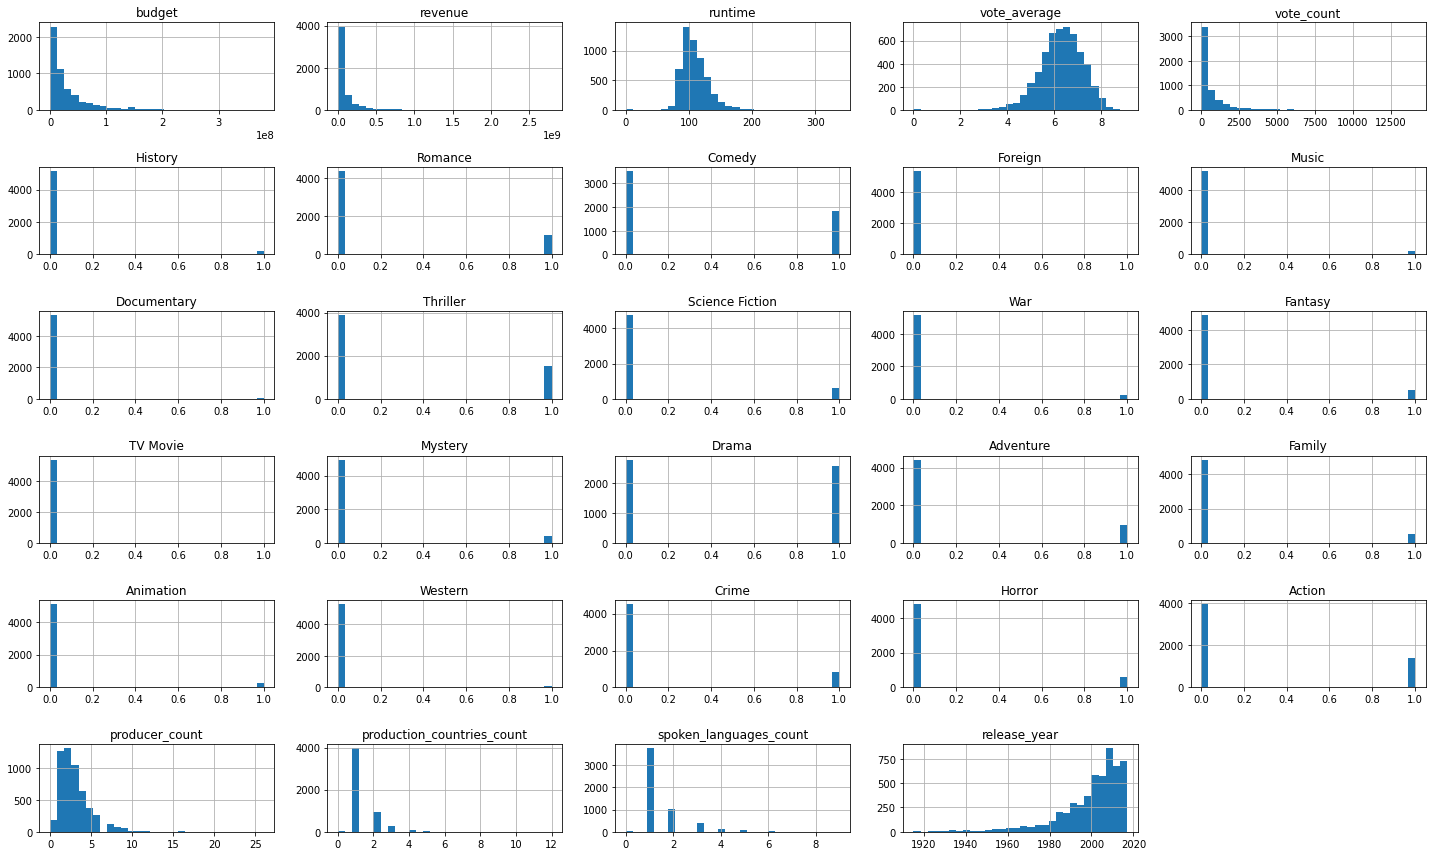

In [486]:
df_movie_revenue_budget.hist(bins=30,figsize=(20,12))
plt.tight_layout();

to be continued...